In [1]:
from itertools import combinations
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

## algorithm

In [2]:
def k_cliques(graph):
    # 2-cliques
    cliques = [{i, j} for i, j in graph.edges() if i != j]
    k = 2
    
    while cliques:
        # result
        yield k, cliques
        
        # merge k-cliques into (k+1)-cliques
        cliques_1 = set()
        for u, v in combinations(cliques, 2):
            w = u ^ v
            if len(w) == 2 and graph.has_edge(*w):
                cliques_1.add(tuple(u | w))

        # remove duplicates
        cliques = list(map(set, cliques_1))
        k += 1        

In [3]:
def print_cliques(graph):
    for k, cliques in k_cliques(graph):
        print('%d-cliques: #%d, %s ...' % (k, len(cliques), cliques[:3]))

## graph #1

In [4]:
nodes = 6
graph = nx.Graph()
graph.add_nodes_from(range(nodes))
graph.add_edges_from(combinations(range(nodes), 2))

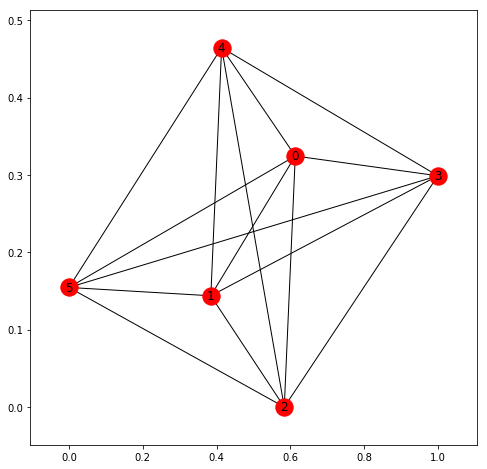

In [5]:
plt.figure(figsize=(8, 8))
nx.draw_networkx(graph)

In [6]:
print_cliques(graph)

2-cliques: #15, [{0, 1}, {0, 2}, {0, 3}] ...
3-cliques: #20, [{2, 3, 5}, {3, 4, 5}, {0, 3, 4}] ...
4-cliques: #15, [{0, 1, 3, 5}, {0, 1, 2, 3}, {0, 1, 3, 4}] ...
5-cliques: #6, [{1, 2, 3, 4, 5}, {0, 1, 3, 4, 5}, {0, 1, 2, 3, 5}] ...
6-cliques: #1, [{0, 1, 2, 3, 4, 5}] ...


## graph #2

In [7]:
nodes, edges = 10, 50
graph = nx.Graph()
graph.add_nodes_from(range(nodes))
graph.add_edges_from(np.random.randint(0, nodes, (edges, 2)))

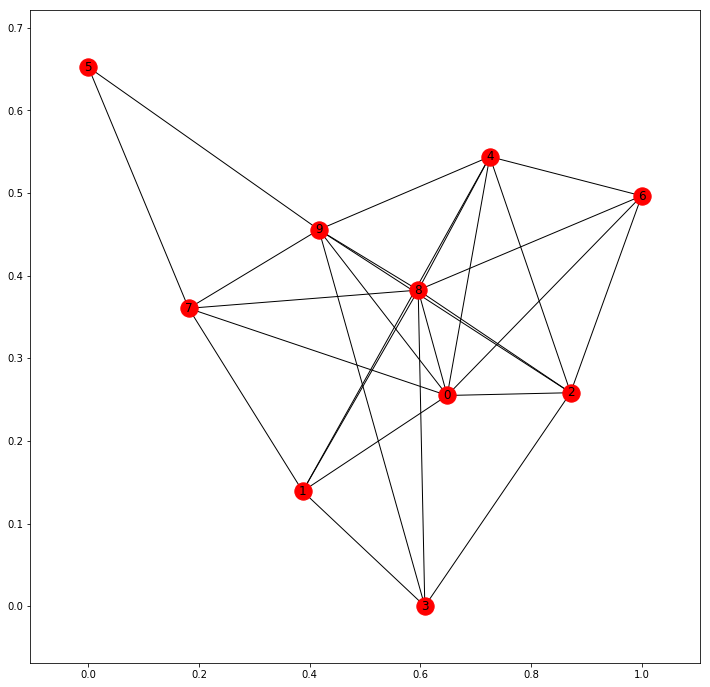

In [8]:
plt.figure(figsize=(12, 12))
nx.draw_networkx(graph)

In [9]:
print_cliques(graph)

2-cliques: #27, [{0, 6}, {0, 1}, {0, 4}] ...
3-cliques: #31, [{8, 2, 3}, {8, 1, 7}, {0, 8, 2}] ...
4-cliques: #13, [{0, 8, 4, 6}, {0, 1, 4, 8}, {8, 9, 2, 3}] ...
5-cliques: #2, [{0, 2, 4, 8, 9}, {0, 2, 4, 6, 8}] ...


## graph #3

In [10]:
nodes, edges = 100, 1000
graph = nx.Graph()
graph.add_nodes_from(range(nodes))
graph.add_edges_from(np.random.randint(0, nodes, (edges, 2)))

In [11]:
print_cliques(graph)

2-cliques: #914, [{0, 58}, {0, 1}, {0, 90}] ...
3-cliques: #1126, [{33, 26, 34}, {4, 31, 84}, {88, 64, 31}] ...
4-cliques: #142, [{18, 3, 76, 85}, {27, 28, 77, 55}, {44, 37, 60, 92}] ...
